In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings ("ignore")

In [ ]:
#importing dataset using pandas

concrete_df = pd.read_csv("Concrete Compressive Strength.csv")

In [ ]:
concrete_df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [ ]:
# Separating dependent and independent variable.
X_raw = concrete_df.drop(columns=['strength '], axis=1)
Y = concrete_df['strength ']

In [ ]:
# Preparing the data to fit Linear regression
def Prepare_data(X):
    X.columns = ['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8']
    X_0 = pd.DataFrame({'X_0' : [1]*1030})
    df = pd.concat([X_0,X],axis = 1, join = 'inner')
    arr=np.array(df)
    return df,arr

In [ ]:
df, X = Prepare_data(X_raw)
print("____________________________________The prepared data is_______________________________________________________")
df

____________________________________The prepared data is_______________________________________________________


,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8
0,1,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,1,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...,...
1025,1,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,1,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,1,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,1,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [ ]:
# function to estimate parameters
def Parameter_est( X ,y):
    Transpose = X.T
    mal = np.matmul(X.T,X)
    inv = np.linalg.inv(mal)
    b_hat = np.matmul(np.matmul(inv,X.T),y)
    return b_hat

# Assign the estimated parameters to b_hat
b_hat = Parameter_est( X ,Y)
print("_____________________________________The weight parameters are__________________________________________________________")
b_hat

_____________________________________The weight parameters are__________________________________________________________


array([-2.31637558e+01,  1.19785255e-01,  1.03847249e-01,  8.79430817e-02,
       -1.50297904e-01,  2.90686943e-01,  1.80301836e-02,  2.01544557e-02,
        1.14225620e-01])

In [ ]:
# Function the Linear Regression
def linearRegression(beta):
    print ( "___________________________________The fitted equation is____________________________________________________________")
    print (f"y_hat={b_hat[0]:.3f}X_0+{b_hat[1]:.3f}X_1+{b_hat[2]:.3f}X_2+{b_hat[3]:.3f}X_3+{b_hat[4]:.3f}X_4+{b_hat[5]:.3f}X_5+{b_hat[6]:.3f}X_6+{b_hat[7]:.3f}X_7+{b_hat[8]:.3f}X_8}}")
    print ( "______________________________________________________________________________________________________________________")

# Fitting the equation:
linearRegression(b_hat)


# predicting the dependent variable using the fitted equation
y_hat = X@b_hat
print("________________________________________The Predicted Values are__________________________________________________________")
print(y_hat)

___________________________________The fitted equation is____________________________________________________________
y_hat=-23.164X_0+0.120X_1+0.104X_2+0.088X_3+-0.150X_4+0.291X_5+0.018X_6+0.020X_7+0.114X_8}
______________________________________________________________________________________________________________________
________________________________________The Predicted Values are__________________________________________________________
[53.4728591  53.74331185 56.81194746 ... 26.47099254 29.11564722
 31.89398622]


In [ ]:
#Error calculation:
def Errors(y_true, y_pred):
    e = y_true - y_pred
    mse = ((e**2).sum())/X.shape[0]
    return mse
mse = Errors(Y,y_hat)

print("Mean squared error is: ", mse)
rmse = np.sqrt(mse)
print("Root mean squared error is: {}".format(rmse))

Mean squared error is:  107.21180273479736
Root mean squared error is: 10.354313243030527


In [ ]:
# Function to create ANOVA Table
def Anova(y_true,y_pred):
    # Total variation
    SSt = ((y_true-y_true.mean())**2).sum()
    degree_t = X.shape[0] - 1
    # Residual variation
    SSres= ((y_true - y_pred)**2).sum()
    degree_res = X.shape[0] - X.shape[1]
    MSres = SSres/degree_res
    # variation due to regression
    SSreg = SSt-SSres
    degree_reg = X.shape[1]-1
    MSreg= SSreg/degree_reg
    F = MSreg/MSres
    return degree_res,degree_reg, SSres,SSreg,MSres,MSreg, F

degree_res, degree_reg, SSres,SSreg,MSres,MSreg, F = Anova(Y,y_hat)

In [ ]:
# Creating ANOVA Table
anova_dict = {'DF':[degree_reg, degree_res, degree_reg+degree_res], 'SS':[SSreg, SSres, SSreg+SSres], 'MS':[MSreg, MSres, MSreg+MSres], 'F':[F]}
Anova_df = pd.DataFrame(anova_dict,index=["Regression","Residual","Total"])
print("__________________________________________________ANOVA Table____________________________________________________________")
Anova_df

__________________________________________________ANOVA Table____________________________________________________________


,DF,SS,MS,F
Regression,8,176744.871659,22093.108957,204.269137
Residual,1021,110428.156817,108.156863,204.269137
Total,1029,287173.028476,22201.265820,204.269137


In [ ]:
# Testing Null hypothesis
print("________________________________________________________________________________________________________________________")
print(f"H0: b0=b1=............bk-1=0 against \nH1: bi!=0 for i=0 to k-1")
print("If F>F{alpha, k-1, n-k}, The H0 is rejested")
print("_________________________________________________________________________________________________________________________")
import scipy.stats
from scipy.stats import f
alpha = 0.05
q = 1 - alpha
f = f.ppf(q, degree_reg, degree_res)
print(f"The calcylated f value is: {f}" )
print(f"The observed f value is {F}")
if(abs(F)>f):
        print("The null hypothesis H0 is rejected")
else:
        print("The null hypothesis H0 is accepted")

________________________________________________________________________________________________________________________
H0: b0=b1=............bk-1=0 against 
H1: bi!=0 for i=0 to k-1
If F>F{alpha, k-1, n-k}, The H0 is rejested
_________________________________________________________________________________________________________________________
The calcylated f value is: 1.9474558084667661
The observed f value is 204.2691365659187
The null hypothesis H0 is rejected


In [ ]:
# Predict R^2 value and adjusted R^2 value:
R_sq = (SSreg/ (SSres+SSreg) ) * 100
AdjR_sq = (1- MSres/(MSres+MSreg)) * 100
print(f"The R square value is:{R_sq}")
print(f"Adjusted R square value is: {AdjR_sq}")

The R square value is:61.54647342657952
Adjusted R square value is: 99.51283470241574


In [ ]:
# Test on individual regression coefficient (Partial test or Marginat Test)
Corr = np.linalg.inv(X.T@X)
from scipy.stats import t
def Marginal_test(beta, C, MSres,X):
    n = X.shape[1]
    for i in range(n):
        T = beta[i]/np.sqrt(MSres*C[i][i])
        if(abs(T)>t.ppf(1-0.05, degree_res)):
            print(f"H0:b{i}=0 is rejected")
        else:
            print(f"HØ:b{i}=0 is accepted")

Marginal_test(b_hat,Corr,MSres,X)

HØ:b0=0 is accepted
H0:b1=0 is rejected
H0:b2=0 is rejected
H0:b3=0 is rejected
H0:b4=0 is rejected
H0:b5=0 is rejected
H0:b6=0 is rejected
H0:b7=0 is rejected
H0:b8=0 is rejected


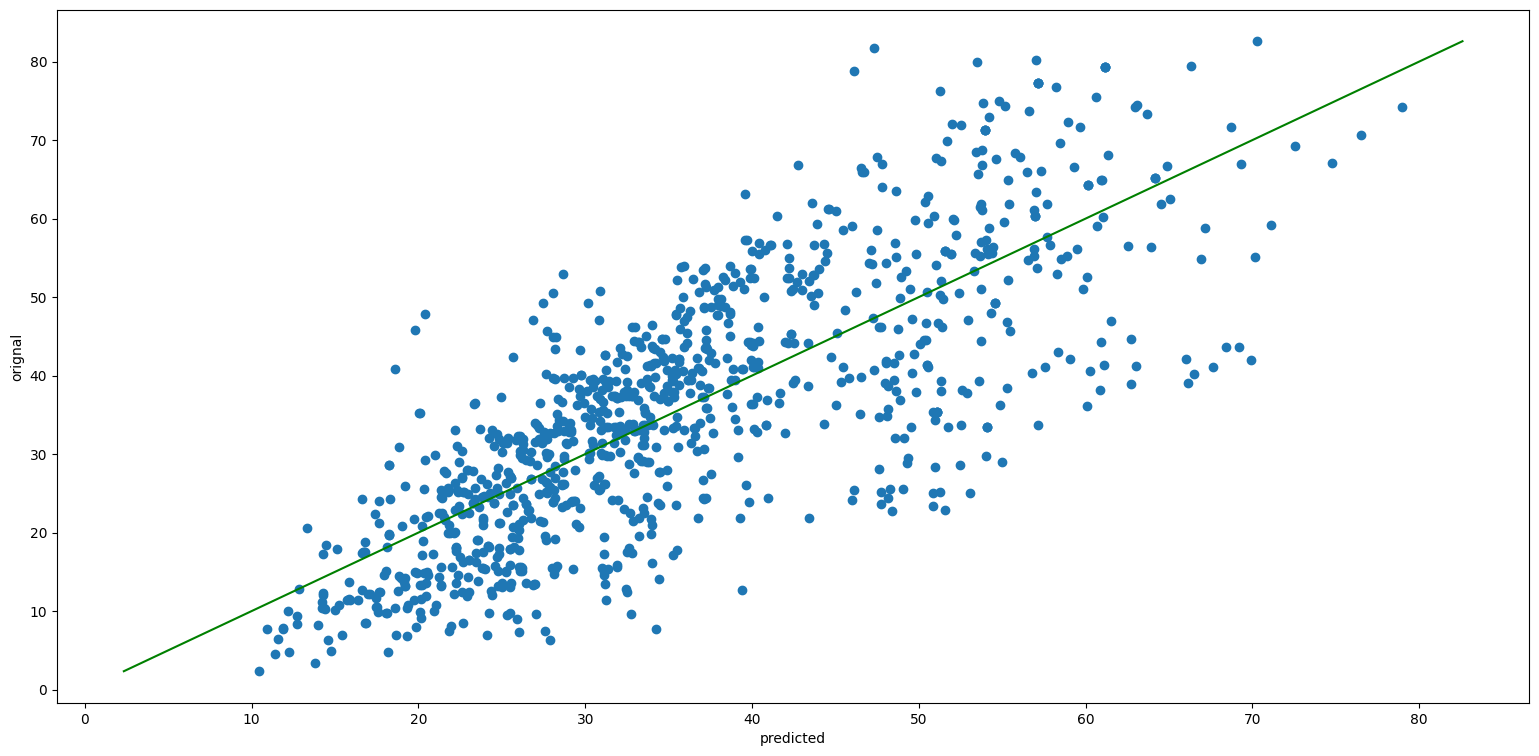

In [ ]:
# Plot the regression Line fitted by the function made
plt.figure(figsize=[19 , 9])
plt.scatter( y_hat, Y)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color = 'green')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [ ]:
# trying the inbuilt regression functionn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
fit = lr.fit(X,Y)
print( '.......................................................................')
y_predict = lr.predict(X)
print( 'mean_ squred_error is ==',mean_squared_error(Y, y_predict))
rms = np.sqrt(mean_squared_error(Y,y_predict))
print( 'root mean squared error is == {}'.format(rms))
print("________________________________________________The predicted values are_______________________________________________")
y_predict

.......................................................................
mean_ squred_error is == 107.21180273479736
root mean squared error is == 10.354313243030527
________________________________________________The predicted values are_______________________________________________


array([53.4728591 , 53.74331185, 56.81194746, ..., 26.47099254,
       29.11564722, 31.89398622])

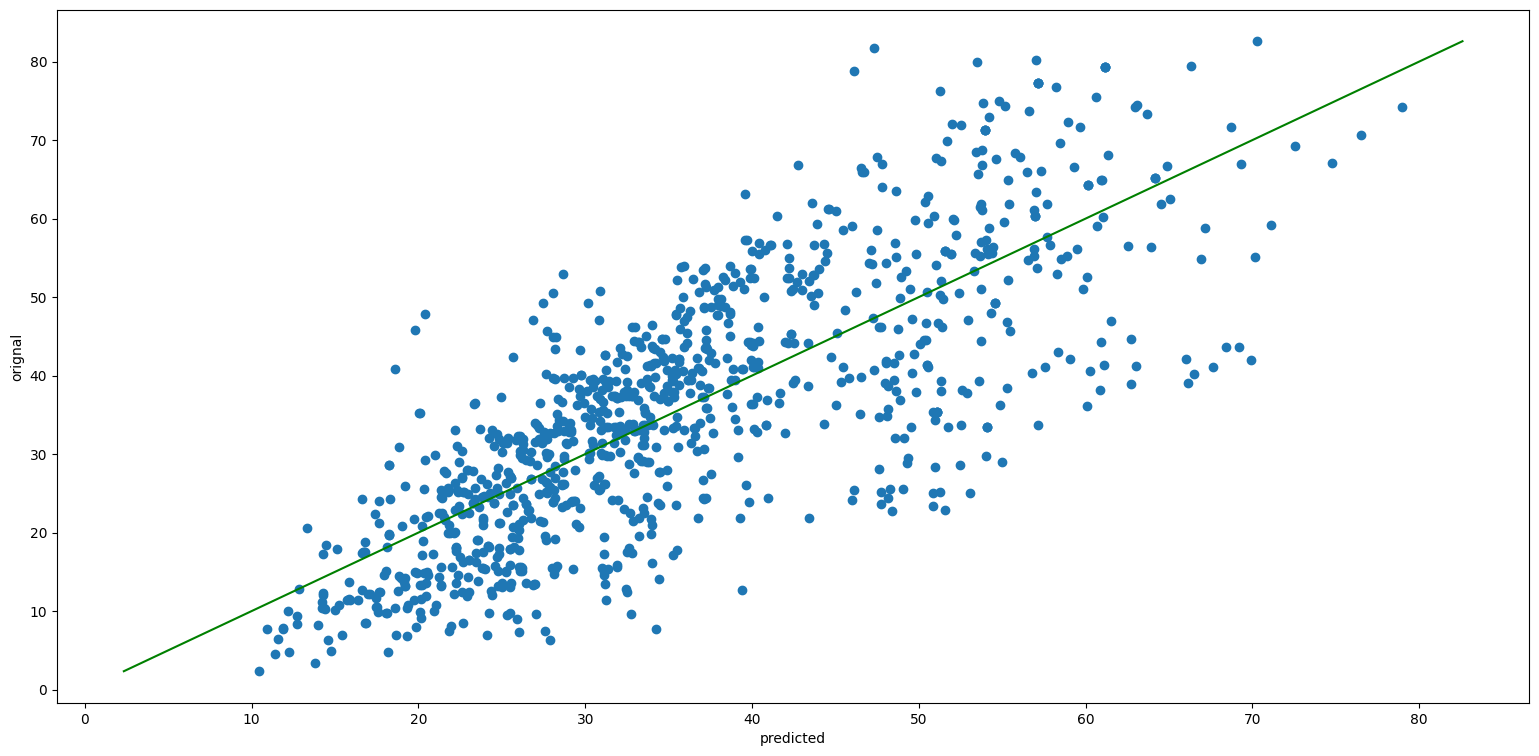

In [ ]:
# Plot the regression Line fitted by the inbuilt libraries in python
plt.figure(figsize=[19 , 9])
plt.scatter( y_predict, Y)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color = 'green')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

<Axes: >

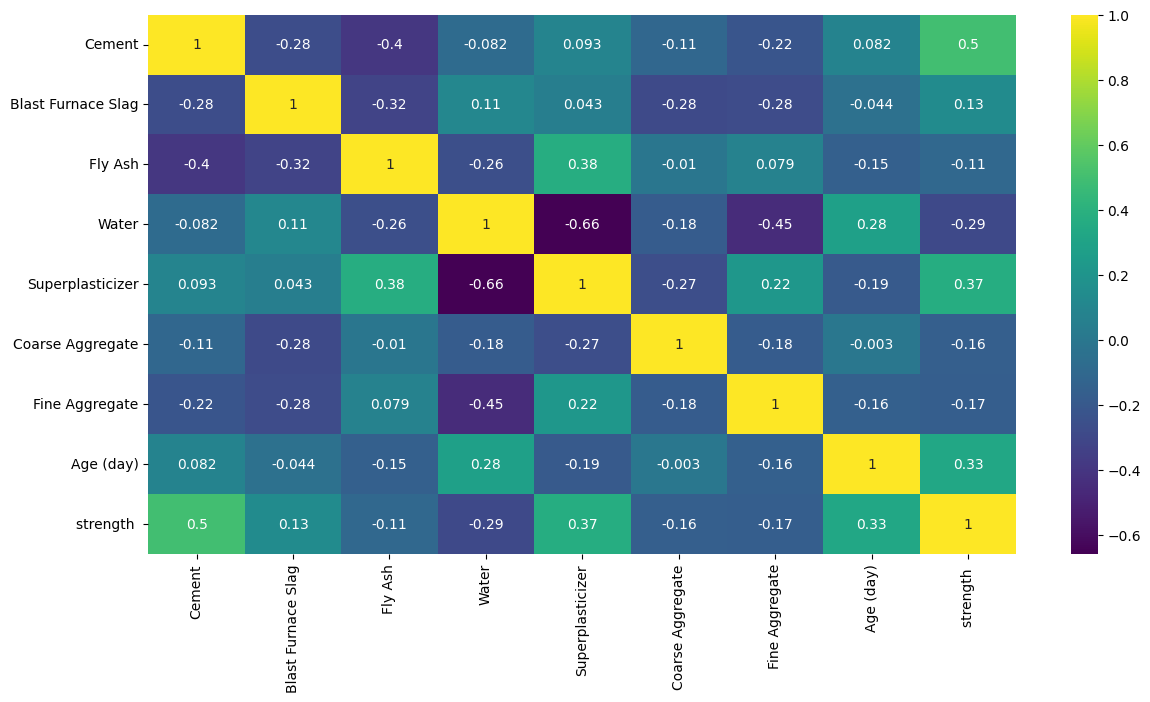

In [ ]:
# Plot heatmap to check multicollinearity
plt.figure(figsize = (14,7))
sns.heatmap(concrete_df.corr( ), annot=True, cmap='viridis')

In [ ]:
# check for any duplicate values in the data
duplicates = concrete_df.duplicated()
concrete_df[duplicates]
duplicates.value_counts( )

False    1005
True       25
Name: count, dtype: int64

In [ ]:
# Dropping duplicate values.
concrete_df=concrete_df.drop_duplicates()
concrete_df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


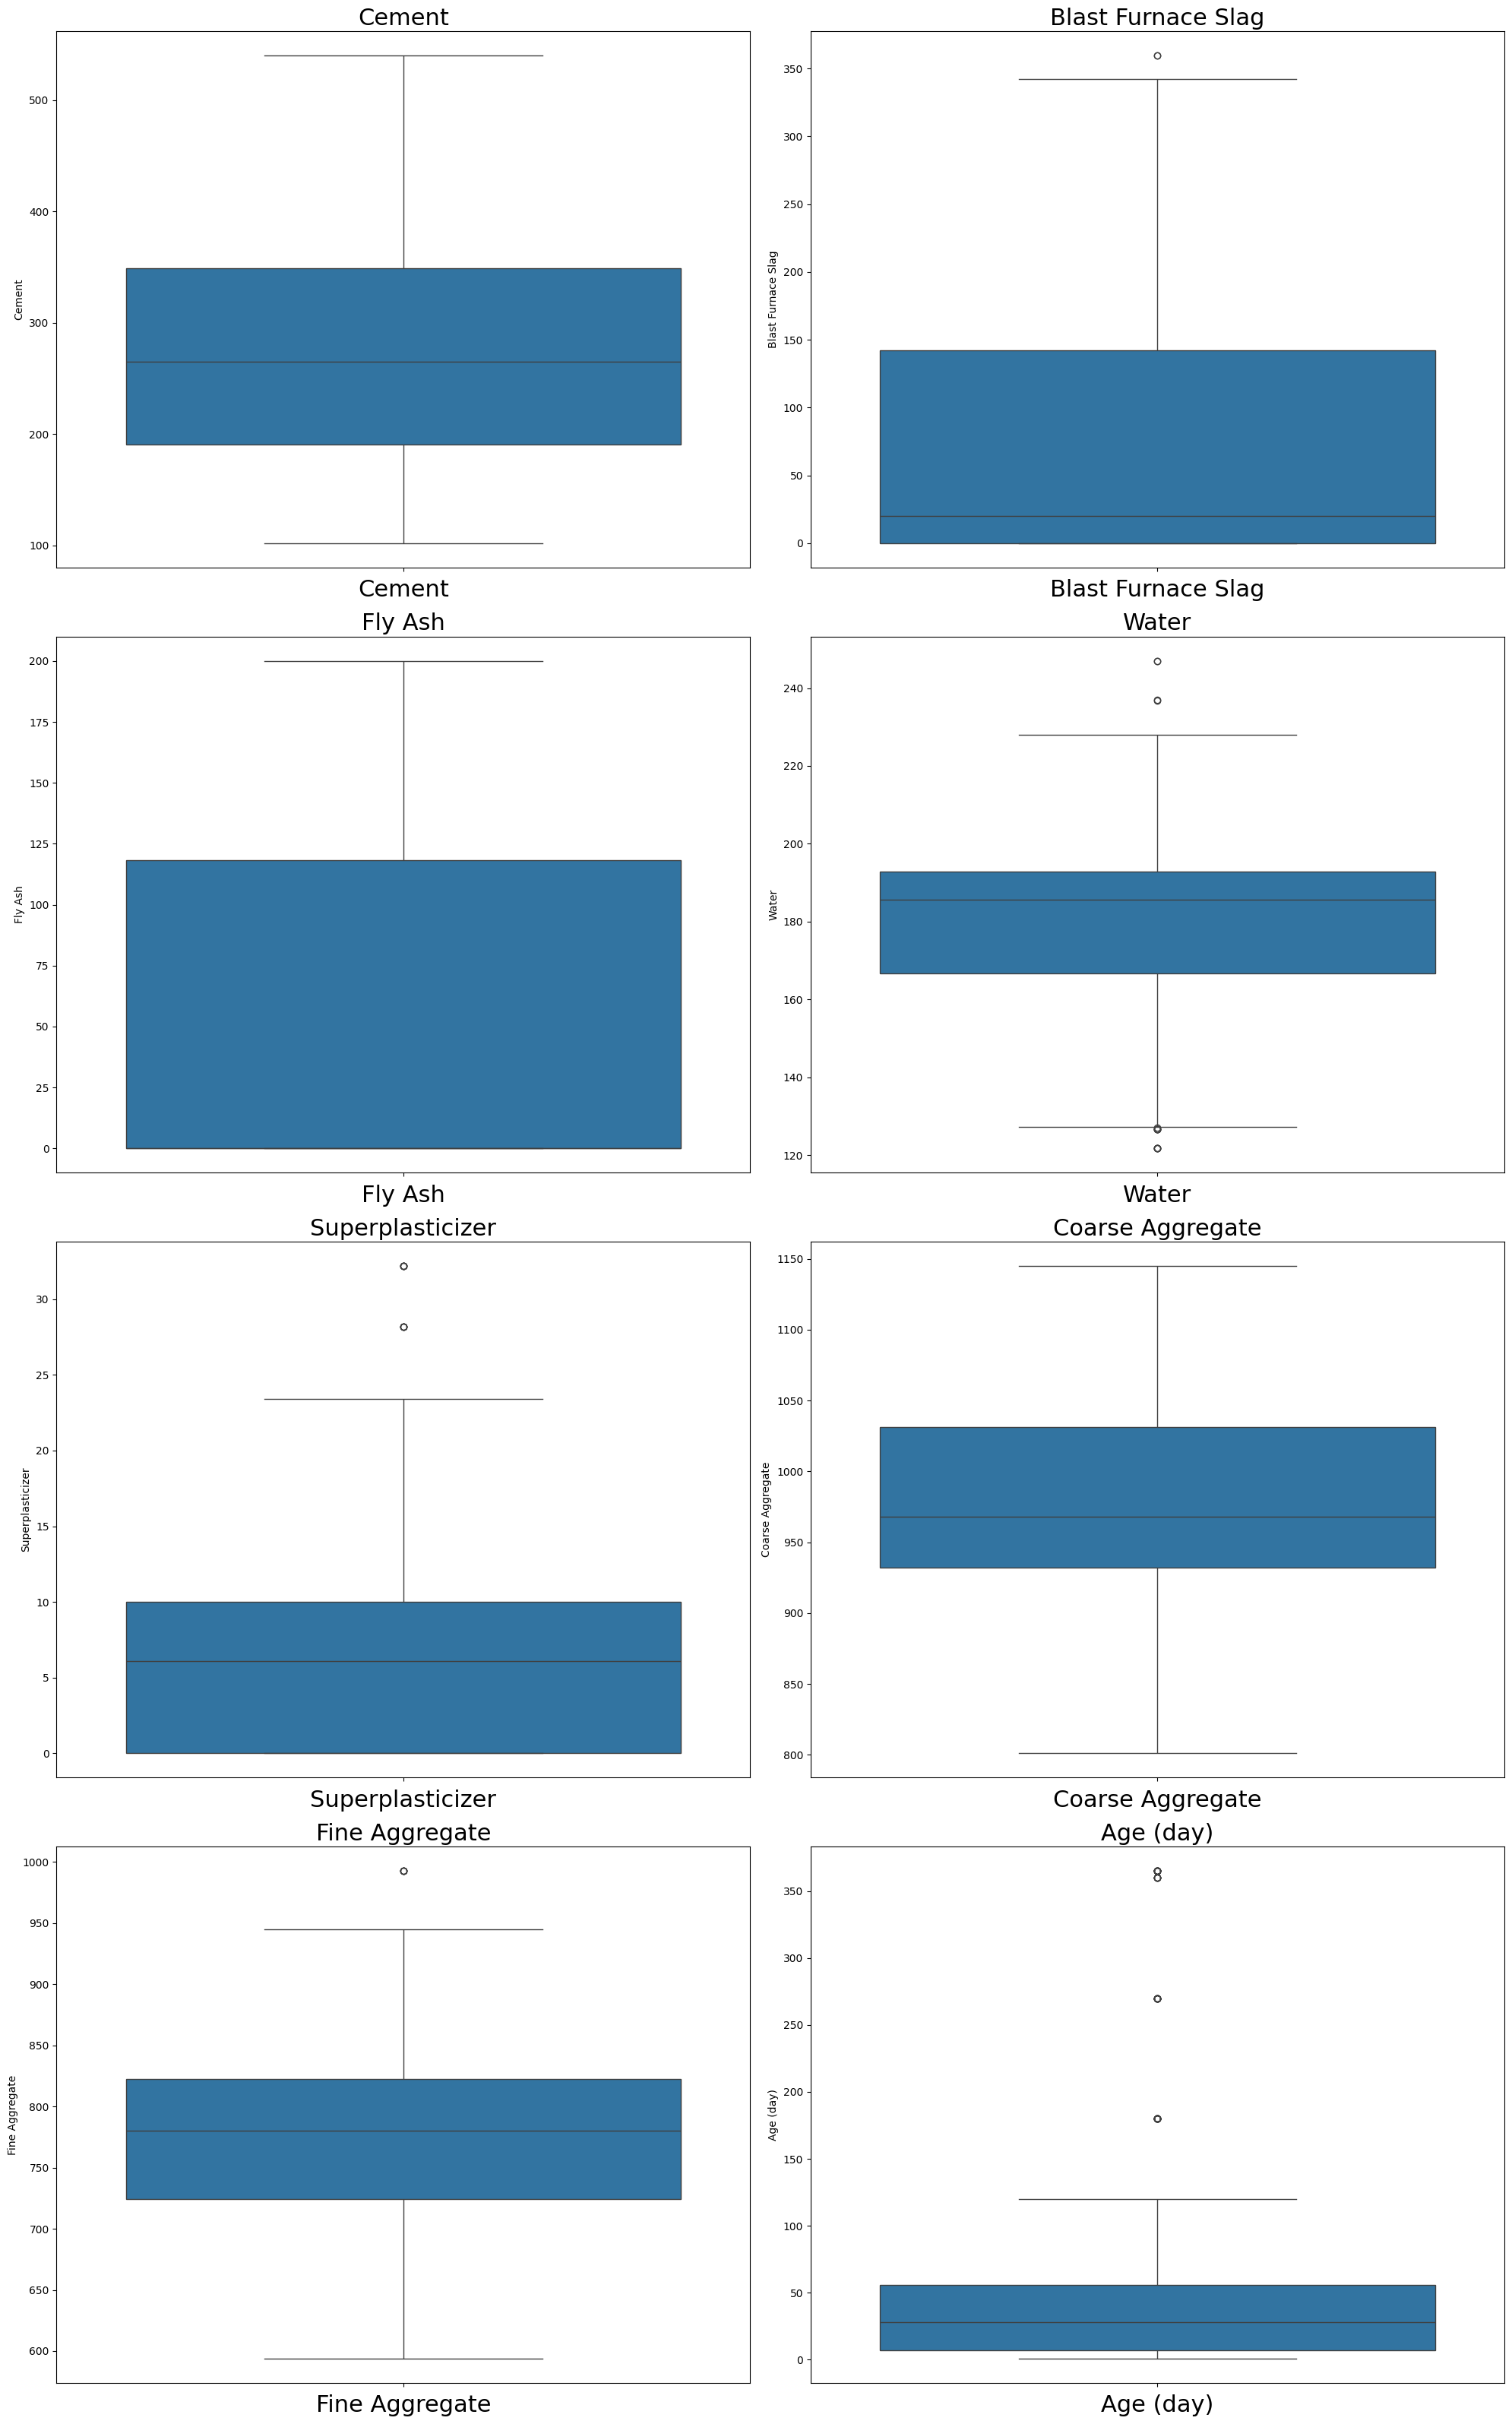

In [ ]:
fig, axes = plt.subplots(nrows=len(concrete_df.iloc[:,:-1].columns)//2, ncols=2, figsize=(20, 32))
axes = axes.flatten()

for i, column in enumerate(concrete_df.iloc[:,:-1].columns):
    sns.boxplot(concrete_df[column], ax=axes[i])
    axes[i].set_title(column, fontsize = 22)
    axes[i].tick_params(axis='x', labelsize=18)
    axes[i].set_xlabel(column, fontsize=22)

plt.tight_layout()
plt.show()


In [ ]:
def remove_outlier(col):
    col_sorted = sorted(col, reverse=True)
    Q1, Q3 = pd.Series(col_sorted).quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

for i in concrete_df.columns:
    l_r, u_r = remove_outlier(concrete_df[i])
    concrete_df[i].loc[~concrete_df[i].between(l_r, u_r)] = pd.NA

concrete_df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,NaN
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,NaN,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,NaN,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,NaN,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.768036


In [ ]:
rows_with_nan = concrete_df[concrete_df.isna().any(axis=1)]

rows_with_nan

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,NaN
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,NaN,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,NaN,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,NaN,44.296075
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,NaN,43.698299
...,...,...,...,...,...,...,...,...,...
862,140.0,164.0,128.0,NaN,6.0,869.0,656.0,28.0,35.225329
873,237.0,92.0,71.0,NaN,6.0,853.0,695.0,28.0,28.627044
908,313.0,145.0,0.0,NaN,8.0,1000.0,822.0,28.0,44.519465
936,236.9,91.7,71.5,NaN,6.0,852.9,695.4,28.0,28.629801


In [ ]:
concrete_df.dropna(inplace=True)
concrete_df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),strength
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.887366
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.029847
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28.0,39.289790
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.768036


In [ ]:
# Separating dependent and independent variable.
X_raw = concrete_df.drop(columns=['strength '], axis=1)
Y = concrete_df['strength ']

In [ ]:
df= X_raw
arr = np.array(df)
print("_____________________________The prepared data is__________________________")
df

_____________________________The prepared data is__________________________


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day)
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28.0
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0


In [ ]:
df = df.astype(float)
X = df

In [ ]:
# function to estimate parameters
def Parameter_est( X ,y):
    Transpose = X.T
    mal = np.matmul(X.T,X)
    inv = np.linalg.inv(mal)
    b_hat = np.matmul(np.matmul(inv,X.T),y)
    return b_hat

# Assign the estimated parameters to b_hat
b_hat = Parameter_est( X ,Y)
print("_____________________________________The weight parameters are__________________________________________________________")
b_hat

_____________________________________The weight parameters are__________________________________________________________


0    0.114994
1    0.090383
2    0.067183
3   -0.176913
4    0.266261
5    0.005134
6    0.010068
7    0.307632
dtype: float64

In [ ]:
# Function the Linear Regression #issue
def linearRegression(beta):
    print ( "___________________________________The fitted equation is____________________________________________________________")
    print (f"y_hat={b_hat[0]:.3f}X_1+{b_hat[1]:.3f}X_2+{b_hat[2]:.3f}X_3+{b_hat[3]:.3f}X_4+{b_hat[4]:.3f}X_5+{b_hat[5]:.3f}X_6+{b_hat[6]:.3f}X_7+{b_hat[7]:.3f}X_8}}")
    print ( "______________________________________________________________________________________________________________________")

# Fitting the equation:
linearRegression(b_hat)

___________________________________The fitted equation is____________________________________________________________
y_hat=0.115X_1+0.090X_2+0.067X_3+-0.177X_4+0.266X_5+0.005X_6+0.010X_7+0.308X_8}
______________________________________________________________________________________________________________________


In [ ]:
# predicting the dependent variable using the fitted equation
b_hat = b_hat.values
y_hat = X@b_hat
print("________________________________________The Predicted Values are__________________________________________________________")
print(y_hat)

________________________________________The Predicted Values are__________________________________________________________
1       54.938918
5       39.773600
7       31.327257
8       20.700388
9       33.665311
          ...    
1025    39.747941
1026    33.914072
1027    25.553784
1028    28.750184
1029    31.866135
Length: 911, dtype: float64


In [ ]:
#Error calculation: #issue
def Errors(y_true, y_pred):
    e = y_true - y_pred
    mse = ((e**2).sum())/X.shape[0]
    return mse
mse = Errors(Y,y_hat)

print("Mean squared error is: ", mse)
rmse = np.sqrt(mse)
print("Root mean squared error is: {}".format(rmse))

Mean squared error is:  60.91449792340836
Root mean squared error is: 7.804774046915667


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures ( degree=3, interaction_only=False , include_bias=True, order= 'C' )
x = poly.fit_transform(X)
poly_clf = linear_model.LinearRegression()
poly_clf.fit (x, Y)
print(poly_clf.score(x,Y))

0.9127433966838785


In [ ]:
print( '.........................................................................')
y_predict = poly_clf.predict(x)
print( 'mean_squared_error is ==' , mean_squared_error(Y,y_predict) )
rms = np.sqrt(mean_squared_error(Y,y_predict))
print( 'root mean squared error is =={}'.format(rms))

.........................................................................
mean_squared_error is == 21.90295702252309
root mean squared error is ==4.680059510574956


In [ ]:
# Function to create ANOVA Table #issue
def Anova(y_true,y_pred):
    # Total variation
    SSt = ((y_true-y_true.mean())**2).sum()
    degree_t = X.shape[0] - 1
    # Residual variation
    SSres= ((y_true - y_pred)**2).sum()
    degree_res = X.shape[0] - X.shape[1]
    MSres = SSres/degree_res
    # variation due to regression
    SSreg = SSt-SSres
    degree_reg = X.shape[1]-1
    MSreg= SSreg/degree_reg
    F = MSreg/MSres
    return degree_res,degree_reg, SSres,SSreg,MSres,MSreg, F

degree_res, degree_reg, SSres,SSreg,MSres,MSreg, F = Anova(Y,y_hat)

In [ ]:
# Creating ANOVA Table #issue
anova_dict = {'DF':[degree_reg, degree_res, degree_reg+degree_res], 'SS':[SSreg, SSres, SSreg+SSres], 'MS':[MSreg, MSres, MSreg+MSres], 'F':[F]}
Anova_df = pd.DataFrame(anova_dict,index=["Regression","Residual","Total"])
print("__________________________________________________ANOVA Table____________________________________________________________")
Anova_df

__________________________________________________ANOVA Table____________________________________________________________


,DF,SS,MS,F
Regression,7,173184.070842,24740.581549,402.585944
Residual,903,55493.107608,61.454161,402.585944
Total,910,228677.178451,24802.035710,402.585944


In [ ]:
# Predict R^2 value and adjusted R^2 value:  #issue
R_sq = (SSreg /(SSreg + SSres)) * 100
AdjR_sq = (1-MSres/(MSres+MSreg)) * 100
print(f"The R squre value is: {R_sq}")
print(f"Adjusted R square value is: {AdjR_sq}")

The R squre value is: 75.73299269117922
Adjusted R square value is: 99.75222130164006


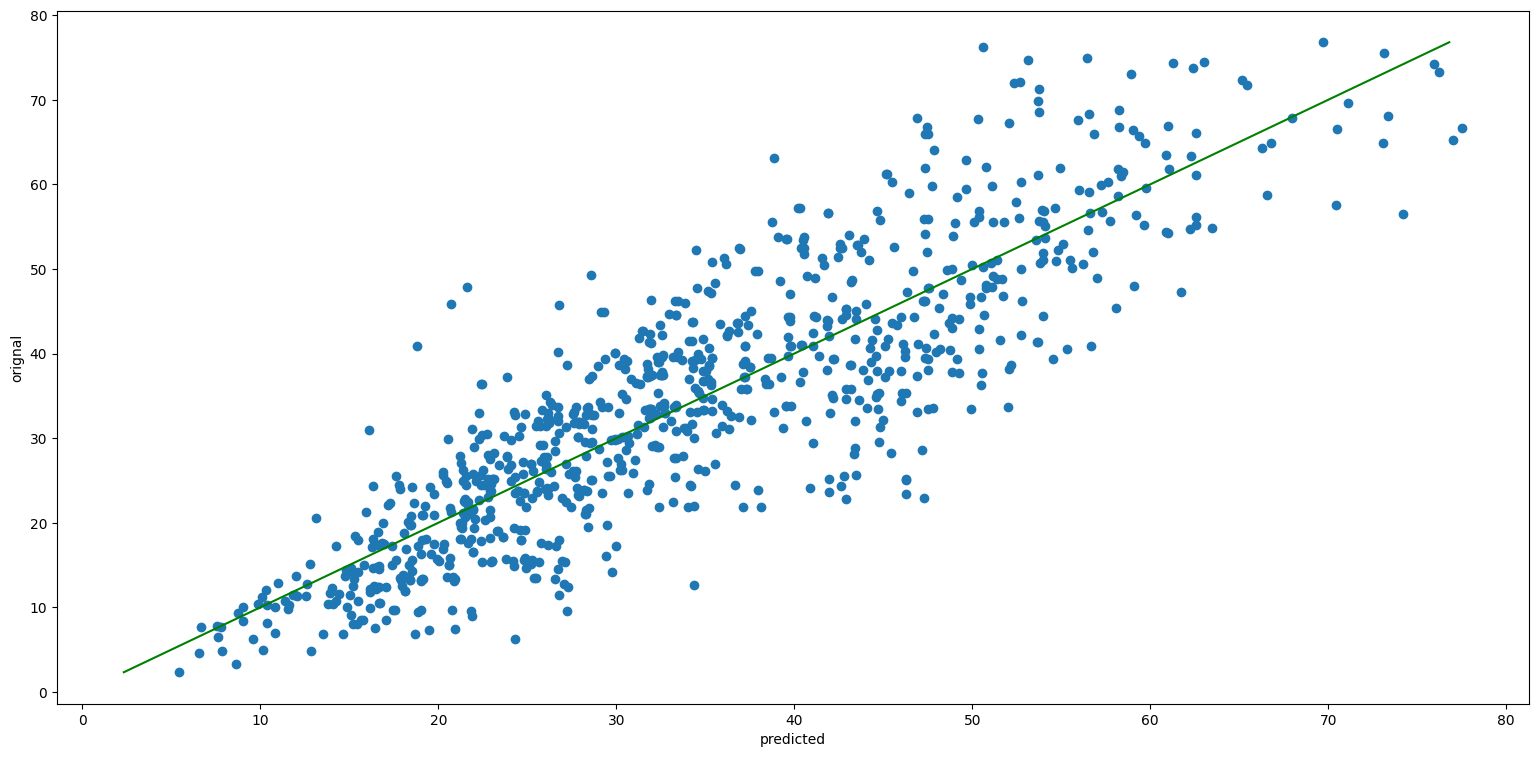

In [ ]:
# Plot the regression Line fitted by the function made  #issue
plt.figure(figsize=[19 , 9])
plt.scatter( y_hat, Y)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color = 'green')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [ ]:
poly_clf.coef_  #issue

array([ 1.17612945e+06, -1.21797726e+02, -9.77272600e+01, -3.53238129e+02,
       -3.76676718e+02,  7.75299185e+02, -1.18724130e+02, -1.19179469e+02,
        6.76041294e+01,  4.58569668e-02,  9.58166345e-02,  2.45367897e-01,
        2.12243902e-01, -5.60072332e-01,  8.08168854e-02,  1.11840964e-01,
       -2.67501689e-02,  3.75291896e-02,  2.29013522e-01,  1.98304849e-01,
       -3.92699479e-01,  3.46025917e-02,  1.13145077e-01, -1.88148400e-02,
        2.29256949e-01,  6.41643566e-01, -4.57356190e-02,  2.31437242e-01,
        3.36810383e-01, -9.65166149e-02,  3.98257205e-01, -1.86653025e+00,
        3.21019854e-01,  2.71458209e-01, -1.92018557e-01, -4.76296405e-01,
       -2.95132931e-01, -9.73777753e-01,  5.63309514e-01,  4.51403153e-02,
        7.60088263e-02, -6.04224986e-02,  4.35843039e-02, -3.54123113e-02,
        8.47042594e-03, -6.06692234e-06, -2.20257821e-05, -4.76342935e-05,
       -2.63208021e-05,  1.38003709e-04, -1.53867654e-05, -2.34148471e-05,
        2.89178690e-06, -

In [ ]:
# function to estimate parameters #issue
def Parameter_est( X ,y):
    Transpose = X.T
    mal = np.matmul(X.T,X)
    inv = np.linalg.inv(mal)
    b_hat = np.matmul(np.matmul(inv,X.T),y)
    return b_hat

# Assign the estimated parameters to b_hat
b_hat = Parameter_est( X ,Y)
print("_____________________________________The weight parameters are__________________________________________________________")
b_hat

_____________________________________The weight parameters are__________________________________________________________


0    0.114994
1    0.090383
2    0.067183
3   -0.176913
4    0.266261
5    0.005134
6    0.010068
7    0.307632
dtype: float64